<a href="https://colab.research.google.com/github/machanigechemba/ReDi-school_course/blob/main/midterm_Project_World_Population_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analyse World Population Data

## Task

1. Have a look at the variables, understand what they are.
2. Pick a variable which interests you in a country.
2. Which other variables are associated with your target variable? Formulate several hypotheses.
3. Explore each hypothesis.
    - Make plots and/or compute statistics.
    - Write a short conclusion, refer to the justifications you found in the data.

## Dataset description

_Source: https://www.kaggle.com/datasets/madhurpant/world-population-data
  (See the bottom of this notebook for the steps to re-create it)_

This dataset describes 192 countries and their populations. Here are the columns, grouped by topic:

1. Height and weight:
    - male_height
    - female_height
    - male_weight
    - female_weight
    - male_bmi
    - female_bmi

2. Life expectancy:
    - male_life_expectancy
    - female_life_expectancy
    - birth_rate
    - death_rate

3. Population density:
    - area
    - population
    - pop_per_km_sq

4. Quality of life:
    - stability
    - rights
    - health
    - safety
    - climate
    - costs
    - popularity

5. Other:
    - iq
    - education_expenditure_per_inhabitant
    - daily_max_temp


#**Key Findings**

* Female life expectancy is higher than male life expectancy. Women live longer while men die early

* Male and female life expectancies are highly positively correlated. If women live longer, men also live longer.

* On averagre, a man lives for 72 years while a woman lives for 77 years

*  Hong Kong is the best country with highest life expectancy

* Hong Kong, Japan, Singapore, Macao, South Korea and Bermuda are leading in life expectancy

* The people in the best countries in life expectancy have very high IQ, at least 101

* Countries with high life expectancy, except Singapore, have a healthy population List item

* Life expectancy is lower when the birth rate is high




## Analysis

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# From https://drive.google.com/file/d/181fFa4h4EigLpMlyu3DXaptm41tXVrNS/view
df = pd.read_csv(
    "https://drive.google.com/uc?id=181fFa4h4EigLpMlyu3DXaptm41tXVrNS",
    index_col=0,
)
df.shape

(192, 23)

In [2]:
df.columns

Index(['male_life_expectancy', 'female_life_expectancy', 'birth_rate',
       'death_rate', 'iq', 'education_expenditure_per_inhabitant',
       'daily_max_temp', 'stability', 'rights', 'health', 'safety', 'climate',
       'costs', 'popularity', 'area', 'population', 'pop_per_km_sq',
       'male_height', 'female_height', 'male_weight', 'female_weight',
       'male_bmi', 'female_bmi'],
      dtype='object')

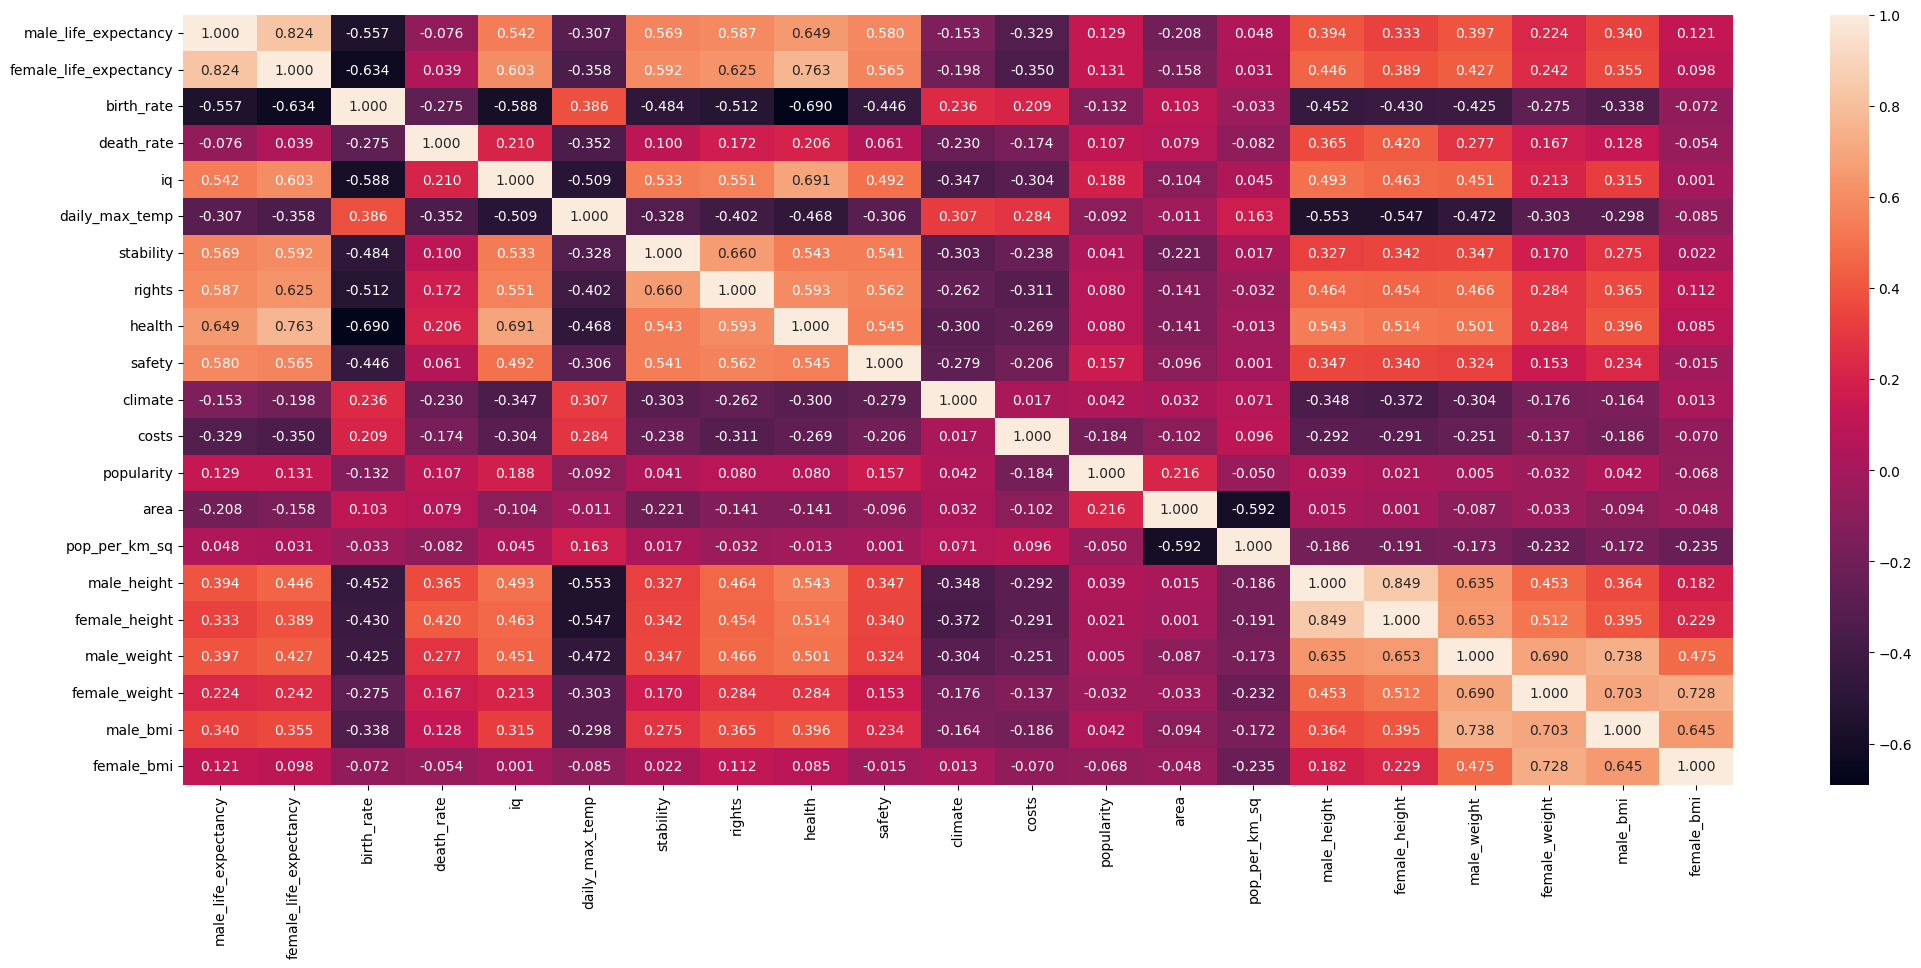

In [3]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(25,10))
df_subset_non_string = df.select_dtypes(exclude="object") #can exclude object data types
sns.heatmap(df_subset_non_string.corr(method="kendall"), annot=True, fmt=".3f", ax=ax);

In [4]:
df[df.columns[::-1]].head()

,female_bmi,male_bmi,female_weight,male_weight,female_height,male_height,pop_per_km_sq,population,area,popularity,...,health,rights,stability,daily_max_temp,education_expenditure_per_inhabitant,iq,death_rate,birth_rate,female_life_expectancy,male_life_expectancy
country,,,,,,,,,,,,,,,,,,,,,
Hong Kong,23.8,24.5,61.1,74.4,160.0,174.0,NaN,NaN,NaN,52.0,...,100.0,85.0,77.0,26.2,915,108.0,6.8,5.8,88.0,82.9
Iceland,25.6,27.1,72.6,89.2,168.0,181.0,NaN,NaN,NaN,33.0,...,87.0,92.0,82.0,8.1,"2,443",101.0,7.8,12.3,84.5,81.7
Japan,21.9,23.6,54.8,69.5,158.0,172.0,332.5,125.68 M,377970.0,41.0,...,92.0,86.0,87.0,19.2,"1,258",105.0,8.8,6.8,87.7,81.6
Norway,26.2,27.4,72.6,89.1,166.0,180.0,14.0,5.41 M,385203.0,37.0,...,90.0,99.0,89.0,9.0,"3,527",99.0,9.8,9.8,84.9,81.6
Singapore,23.2,24.3,60.2,72.8,161.0,173.0,7584.9,5.45 M,719.0,42.0,...,79.0,89.0,83.0,31.5,908,108.0,10.8,8.5,86.1,81.5


In [5]:
#check what are we not plotting. always check what is it that is not in numeric
df_subset_string = df.select_dtypes(include="object")
df_subset_string.head()

,education_expenditure_per_inhabitant,population
country,,
Hong Kong,915,NaN
Iceland,"2,443",NaN
Japan,"1,258",125.68 M
Norway,"3,527",5.41 M
Singapore,908,5.45 M


#**Let us look at life expectancy**

##what is the average life expectancy?

In [6]:
#male vs female life expectancy
df["male_life_expectancy"].describe()

count    115.000000
mean      72.004348
std        7.261318
min       51.500000
25%       67.550000
50%       73.200000
75%       78.150000
max       82.900000
Name: male_life_expectancy, dtype: float64

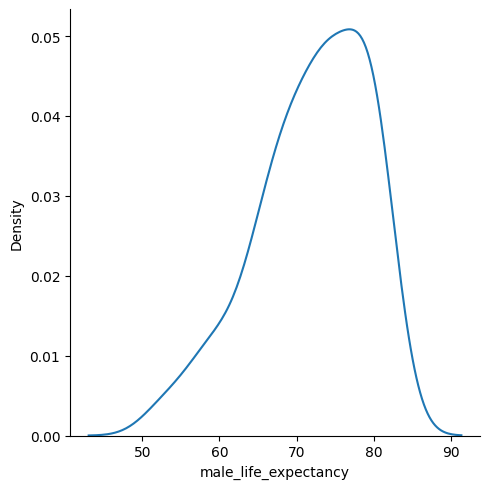

In [7]:
sns.displot(data=df, x="male_life_expectancy", kind="kde")

In [8]:
df["female_life_expectancy"].describe()

count    115.000000
mean      76.963478
std        7.548188
min       55.900000
25%       73.500000
50%       78.600000
75%       82.950000
max       88.000000
Name: female_life_expectancy, dtype: float64

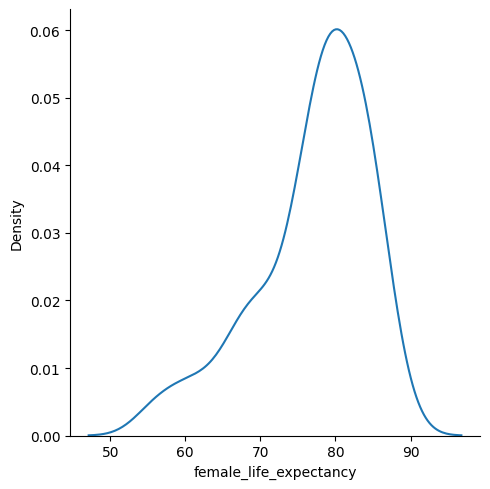

In [9]:
sns.displot(data=df, x="female_life_expectancy", kind="kde")

In [10]:
df["female_life_expectancy"].median()

78.6

In [11]:
df["female_life_expectancy"].head()

country
Hong Kong    88.0
Iceland      84.5
Japan        87.7
Norway       84.9
Singapore    86.1
Name: female_life_expectancy, dtype: float64

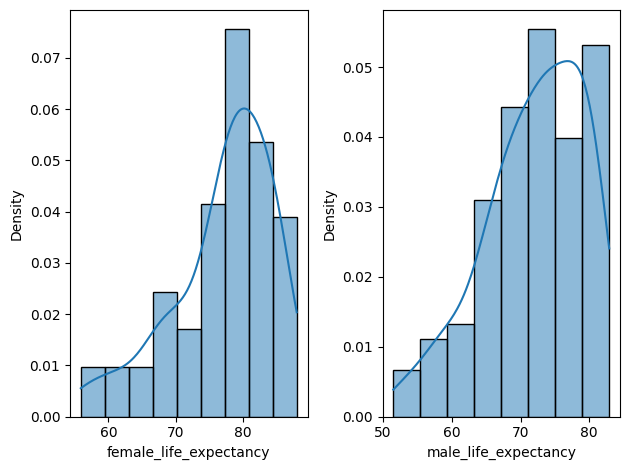

In [12]:
# select the columns to be plotted
cols = ['female_life_expectancy', 'male_life_expectancy']

# create the figure and axes
fig, axes = plt.subplots(1, 2)
axes = axes.ravel()  # flattening the array makes indexing easier

for col, ax in zip(cols, axes):
    sns.histplot(data=df[col], kde=True, stat='density', ax=ax)

fig.tight_layout()
plt.show()

**Conclusion**

Female life expectancy is higher than male life expectancy. Women live longer while men die early

On averagre, a man lives for 72 years while a woman lives for 77 years

The top 25 percent of male and female live for 78 and 82 years, respectively

##Is there any relationship between male and female life expectancy?

In [13]:
df["male_life_expectancy"].corr(df["female_life_expectancy"])

0.9639825923611892

Text(0.5, 1.0, 'Male vs Female Life Expectancy')

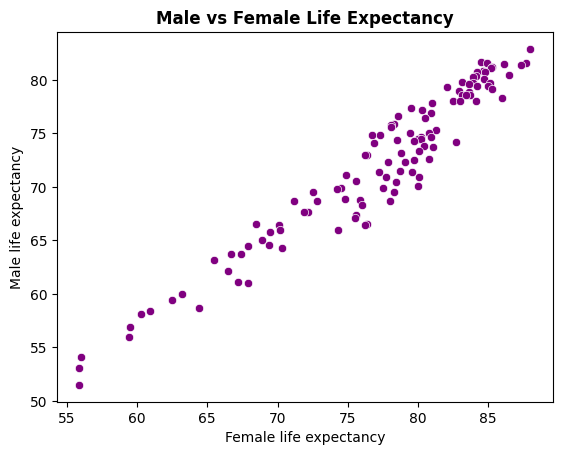

In [14]:
sns.scatterplot(data = df, x = "female_life_expectancy", y = "male_life_expectancy",  color='purple')
plt.xlabel('Female life expectancy')
plt.ylabel('Male life expectancy')
plt.title("Male vs Female Life Expectancy", weight = "bold")

In [15]:
#covariance
df["female_life_expectancy"].cov(df["male_life_expectancy"])

52.83568649885583

Text(0.5, 1.0, 'Male vs Female Life Expectancy')

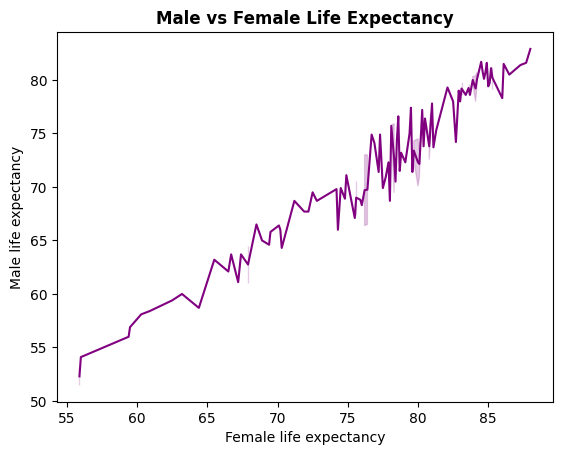

In [16]:
sns.lineplot(data = df, x = "female_life_expectancy", y = "male_life_expectancy",  color='purple')
plt.xlabel('Female life expectancy')
plt.ylabel('Male life expectancy')
plt.title("Male vs Female Life Expectancy", weight = "bold")

Male and female life expectancies are highly positively correlated. If women live longer, men also live longer.

#**Which factors affect life expectancy?**

In [17]:
df_subset_non_string = df.select_dtypes(exclude="object") #can exclude object data types
corr_matrix = df_subset_non_string.corr()

In [18]:
corr_matrix.head()

,male_life_expectancy,female_life_expectancy,birth_rate,death_rate,iq,daily_max_temp,stability,rights,health,safety,...,costs,popularity,area,pop_per_km_sq,male_height,female_height,male_weight,female_weight,male_bmi,female_bmi
male_life_expectancy,1.000000,0.963983,-0.838342,-0.129038,0.766763,-0.450119,0.724741,0.761398,0.879709,0.691495,...,-0.398842,0.138252,-0.096006,0.175004,0.547489,0.436139,0.612868,0.397964,0.587547,0.247746
female_life_expectancy,0.963983,1.000000,-0.898628,0.005914,0.829022,-0.526949,0.730485,0.765041,0.939634,0.687381,...,-0.389149,0.115058,-0.026065,0.140702,0.599658,0.496421,0.666352,0.449131,0.631906,0.273751
birth_rate,-0.838342,-0.898628,1.000000,-0.225931,-0.832078,0.558732,-0.690517,-0.697234,-0.901974,-0.671766,...,0.295684,-0.098382,-0.103783,-0.117501,-0.617808,-0.541485,-0.673853,-0.457757,-0.627228,-0.252470
death_rate,-0.129038,0.005914,-0.225931,1.000000,0.251691,-0.512991,0.135937,0.237114,0.261467,0.086472,...,-0.177162,0.063127,0.149475,-0.019461,0.496739,0.574777,0.383270,0.245509,0.233323,-0.064285
iq,0.766763,0.829022,-0.832078,0.251691,1.000000,-0.672161,0.656473,0.713391,0.869019,0.633862,...,-0.384106,0.190571,0.117146,0.190443,0.644242,0.570142,0.662960,0.384319,0.597253,0.154940


In [19]:
#select factors that highly corr with female life expectancy
female = corr_matrix.query('female_life_expectancy >= 0.5 | female_life_expectancy <= -0.5')

In [20]:
female.shape

(12, 21)

In [21]:
#from female select only female life expectancy
female.iloc[:,1].sort_values(ascending = False)

female_life_expectancy    1.000000
male_life_expectancy      0.963983
health                    0.939634
iq                        0.829022
rights                    0.765041
stability                 0.730485
safety                    0.687381
male_weight               0.666352
male_bmi                  0.631906
male_height               0.599658
daily_max_temp           -0.526949
birth_rate               -0.898628
Name: female_life_expectancy, dtype: float64

There are ten factors that have a positive correlation with female life expectancy

Birth rate and daily maximum temperature correlate negatively with female life expectancy

In [22]:
#male life expectancy
male = corr_matrix.query('male_life_expectancy >= 0.5 | male_life_expectancy <= -0.5')
male.shape

(11, 21)

In [23]:
male.iloc[:, 0].sort_values(ascending = False)

male_life_expectancy      1.000000
female_life_expectancy    0.963983
health                    0.879709
iq                        0.766763
rights                    0.761398
stability                 0.724741
safety                    0.691495
male_weight               0.612868
male_bmi                  0.587547
male_height               0.547489
birth_rate               -0.838342
Name: male_life_expectancy, dtype: float64

There are ten factors that have a positive correlation with male life expectancy

Birth rate correlates negatively with male life expectancy

###How do these factors co-vary with life expectancy?

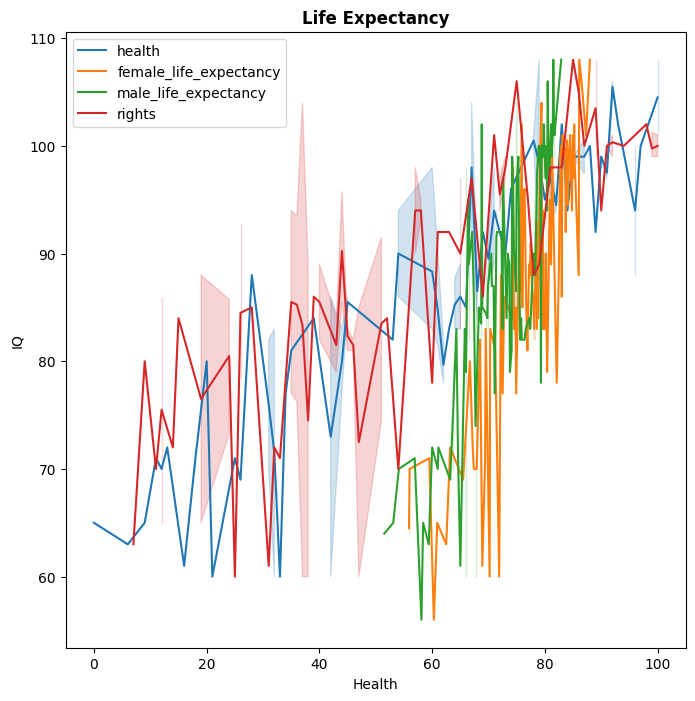

In [24]:
# how health, rights & iq covary with life expectancy
fig, axes = plt.subplots(1,1,figsize=(8,8))
sns.lineplot(data=df, y = "iq",x="health", ax=axes, label = "health")
sns.lineplot(data=df, y = "iq", x="female_life_expectancy", ax=axes, label = "female_life_expectancy")
sns.lineplot(data=df, y = "iq", x = "male_life_expectancy", ax = axes, label = "male_life_expectancy")
sns.lineplot(data=df, y = "iq", x = "rights", ax = axes, label = "rights")
plt.xlabel("Health")
plt.ylabel("IQ")
plt.title("Life Expectancy", weight ="bold")
plt.legend()

**Conclusion**

When the health, IQ and rights of a population increases, life expectancy tends to increase as well

## **Let's visualize factors that correlate positively with life expectancy**

Text(0.5, 1.0, 'Male vs Female Life Expectancy')

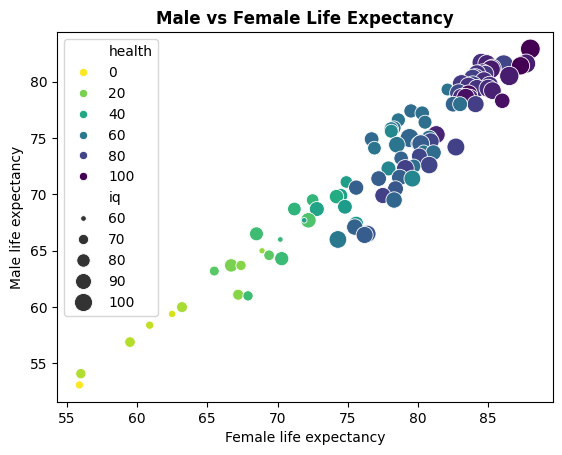

In [25]:
#health & iq corr positively with both male & female life expectancy. visualize the relationship
sns.scatterplot(data = df, x = "female_life_expectancy", y = "male_life_expectancy", hue = "health", palette = "viridis_r", size = "iq", sizes =(1, 200))
plt.xlabel('Female life expectancy')
plt.ylabel('Male life expectancy')
plt.title("Male vs Female Life Expectancy", weight = "bold")

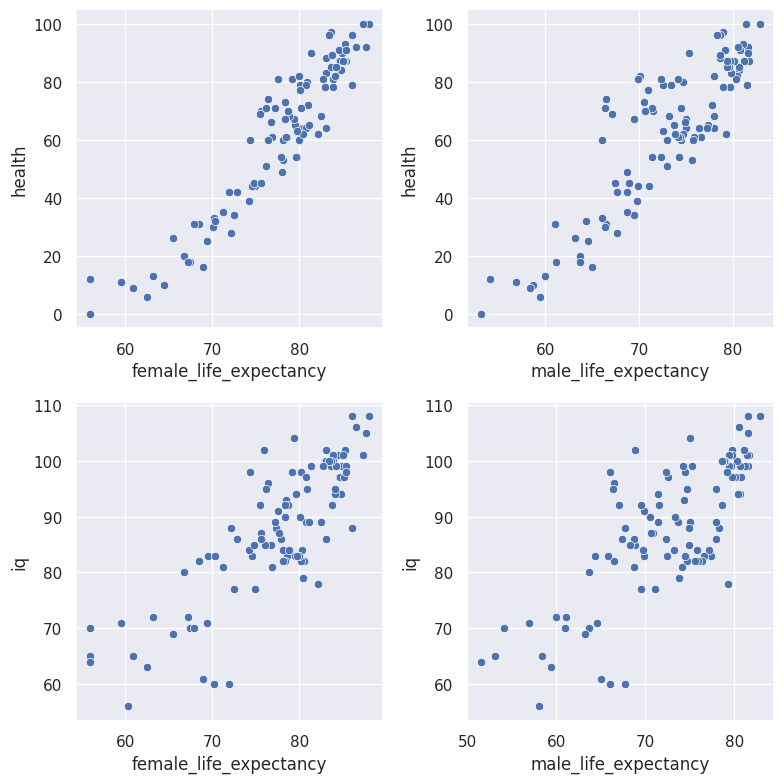

In [26]:
#health + iq
sns.set_theme()
fig, axes = plt.subplots(2,2,figsize=(8,8))
sns.scatterplot(data=df, x="female_life_expectancy",y="health",ax=axes[0,0])
sns.scatterplot(data=df,x="male_life_expectancy",y="health",ax=axes[0,1])
sns.scatterplot(data=df, x="female_life_expectancy",y="iq",ax=axes[1,0])
sns.scatterplot(data=df,x="male_life_expectancy",y="iq",ax=axes[1,1])
fig.tight_layout()

<Axes: xlabel='female_life_expectancy', ylabel='iq'>

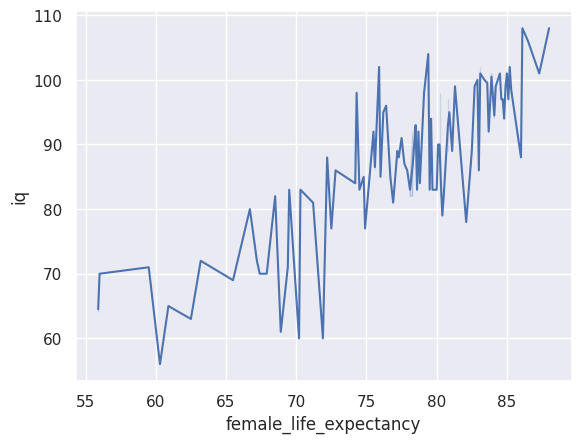

In [27]:
sns.lineplot(data = df, x = "female_life_expectancy", y ="iq")

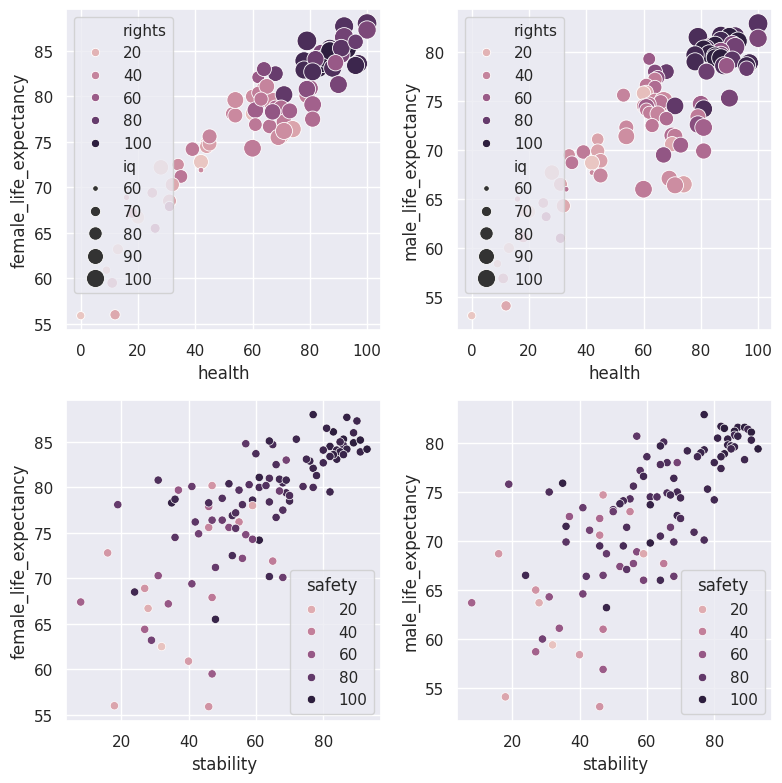

In [28]:
#top positively corr
fig, axes = plt.subplots(2,2,figsize=(8,8))
sns.scatterplot(data=df, y = "female_life_expectancy",x="health", hue = "rights", size="iq", sizes = (1,200), ax=axes[0,0])
sns.scatterplot(data=df, y = "male_life_expectancy", x="health", hue = "rights", size="iq", sizes = (1,200), ax=axes[0,1])

sns.scatterplot(data=df, y="female_life_expectancy",x ="stability", hue= "safety", ax=axes[1,0])
sns.scatterplot(data=df,y="male_life_expectancy",x="stability", hue = "safety", ax=axes[1,1])
fig.tight_layout()

**Conclusion**

Health, IQ and rights have stronger correlation with life expectancy.

Stability and safety have weaker correlation with life expectancy.

###Interestingly, male_weight, male_height, male_bmi correlate positively with both female and male life expectancy

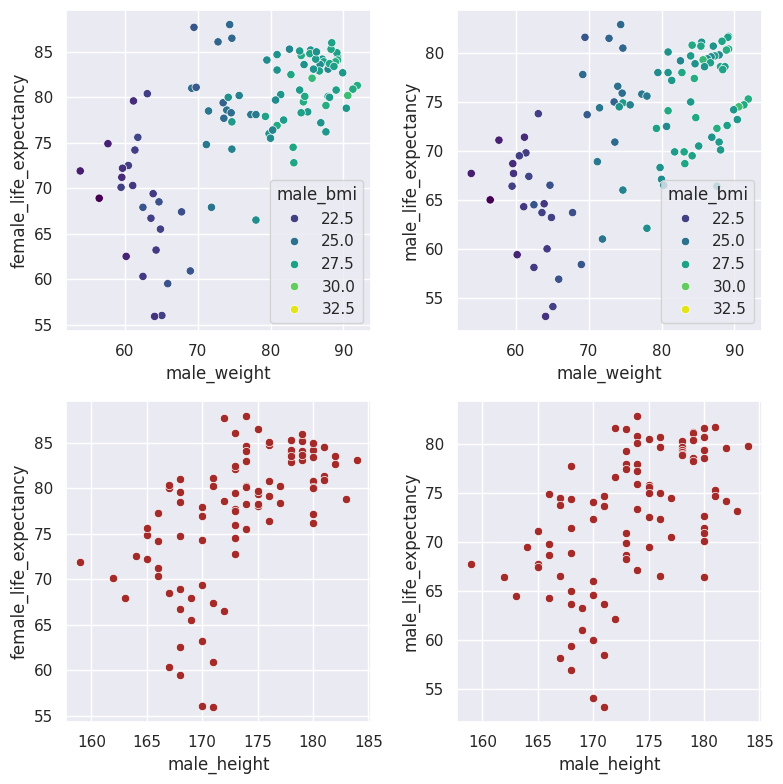

In [29]:
fig, axes = plt.subplots(2,2,figsize=(8,8))
sns.scatterplot(data=df, y = "female_life_expectancy",x="male_weight", hue = "male_bmi", palette ="viridis", ax=axes[0,0])
sns.scatterplot(data=df, y = "male_life_expectancy", x="male_weight", hue = "male_bmi",  palette ="viridis", ax=axes[0,1])

sns.scatterplot(data=df, y="female_life_expectancy",x ="male_height", color ="brown", ax=axes[1,0])
sns.scatterplot(data=df,y="male_life_expectancy",x="male_height", color = "brown", ax=axes[1,1])
fig.tight_layout()

In [30]:
df.head(2)

,male_life_expectancy,female_life_expectancy,birth_rate,death_rate,iq,education_expenditure_per_inhabitant,daily_max_temp,stability,rights,health,...,popularity,area,population,pop_per_km_sq,male_height,female_height,male_weight,female_weight,male_bmi,female_bmi
country,,,,,,,,,,,,,,,,,,,,,
Hong Kong,82.9,88.0,5.8,6.8,108.0,915,26.2,77.0,85.0,100.0,...,52.0,NaN,NaN,NaN,174.0,160.0,74.4,61.1,24.5,23.8
Iceland,81.7,84.5,12.3,7.8,101.0,"2,443",8.1,82.0,92.0,87.0,...,33.0,NaN,NaN,NaN,181.0,168.0,89.2,72.6,27.1,25.6


### Summary statistics of variables that change positively with life expectancy

In [31]:
#mean, max, min, 75% for rows with positive correlation
round(df.iloc[:, [0,1,4,7,8,9, -2, -4, -6]].describe(),2)

,male_life_expectancy,female_life_expectancy,iq,stability,rights,health,male_bmi,male_weight,male_height
count,115.00,115.00,108.00,137.00,137.00,137.00,126.00,126.00,126.00
mean,72.00,76.96,86.57,57.58,50.69,58.12,26.07,78.95,173.67
std,7.26,7.55,13.18,19.33,25.14,26.09,2.68,11.27,5.32
min,51.50,55.90,56.00,8.00,7.00,0.00,20.10,53.90,159.00
25%,67.55,73.50,81.00,46.00,32.00,42.00,24.32,70.15,170.00
50%,73.20,78.60,88.00,57.00,45.00,63.00,26.60,81.50,174.00
75%,78.15,82.95,98.00,72.00,72.00,80.00,27.60,87.52,178.00
max,82.90,88.00,108.00,93.00,100.00,100.00,33.10,103.70,184.00


**Conclusion**

 Health, IQ, rights, stability, safety, male weight, male bmi & male height have a strong positive correlation with life expectancy

 People who are 100% healthy, have 100% rights and an IQ of 108 tend to live longer

 The higher the IQ of a person, the higher the life expectancy

##**Factors that might have a negative impact on life expectancy**

Text(0.5, 1.0, 'Male vs Female Life Expectancy')

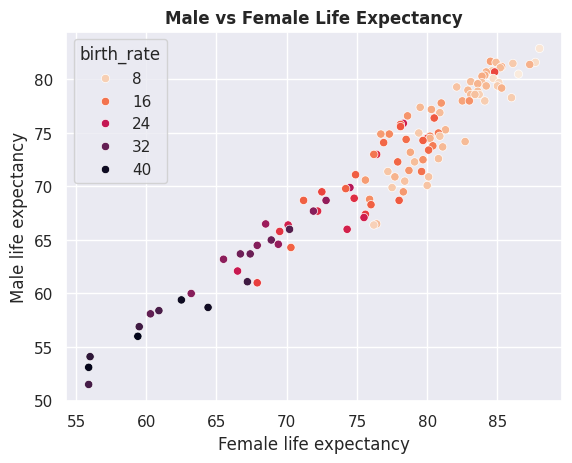

In [32]:
#only birth rate corr negatively with both male & female life expectancy. visualize the relationship
sns.scatterplot(data = df, x = "female_life_expectancy", y = "male_life_expectancy", hue = "birth_rate", palette = "rocket_r")
plt.xlabel('Female life expectancy')
plt.ylabel('Male life expectancy')
plt.title("Male vs Female Life Expectancy", weight = "bold")

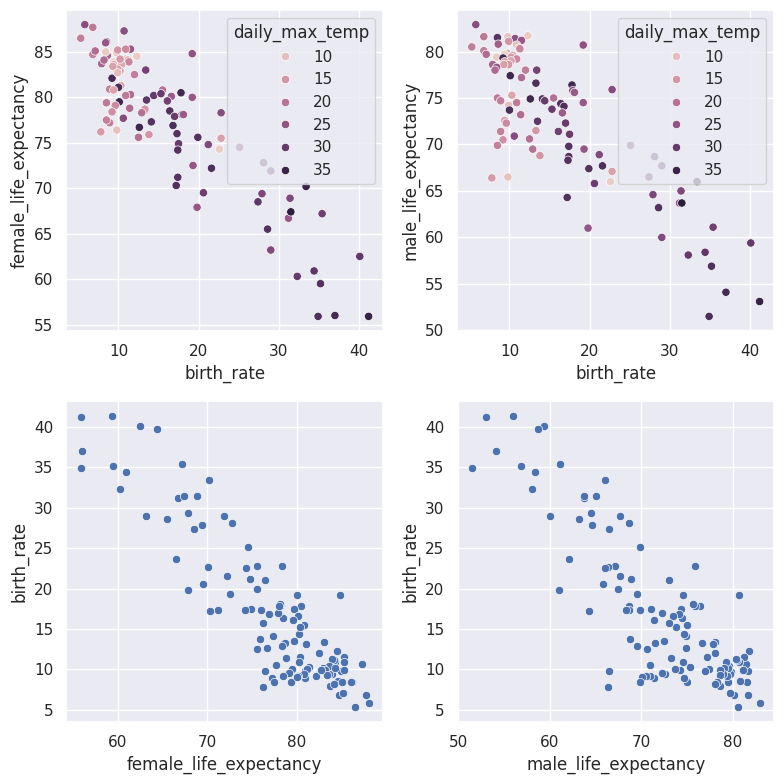

In [33]:
fig, axes = plt.subplots(2,2,figsize=(8,8))
sns.scatterplot(data=df, y="female_life_expectancy",x ="birth_rate", hue= "daily_max_temp", ax=axes[0,0])
sns.scatterplot(data=df,y="male_life_expectancy",x="birth_rate", hue = "daily_max_temp", ax=axes[0,1])

sns.scatterplot(data=df, x="female_life_expectancy",y="birth_rate",ax=axes[1,0])
sns.scatterplot(data=df,x="male_life_expectancy",y="birth_rate",ax=axes[1,1])
fig.tight_layout()

###Summary statistics of variables that change negatively with life expectancy

In [34]:
#mean, max, min, 75% for rows with a negative correlation
df.iloc[:, [0, 1, 2, 6]].describe()

,male_life_expectancy,female_life_expectancy,birth_rate,daily_max_temp
count,115.000000,115.000000,115.000000,108.000000
mean,72.004348,76.963478,16.917391,23.934259
std,7.261318,7.548188,9.091969,7.989504
min,51.500000,55.900000,5.300000,7.300000
25%,67.550000,73.500000,9.850000,17.675000
50%,73.200000,78.600000,13.500000,25.700000
75%,78.150000,82.950000,21.150000,30.925000
max,82.900000,88.000000,41.400000,36.500000


**Conclusion**

Life expectancy is low if the birth rate in high.

Female and male life expectancies have strong and weak negative correlation with daily maximun temperature, respectively. When the temperatures are high, female life expectancy tend to be low.

The highest life expectancy is achieved when the average birth rate is 41.4 and average daily maximum temperature is 36.5

## **Which countries are leading in life expectancy?**

In [35]:
df.index

Index(['Hong Kong', 'Iceland', 'Japan', 'Norway', 'Singapore', 'Macao',
       'Australia', 'Switzerland', 'Malta', 'Israel',
       ...
       'Andorra', 'French Polynesia', 'Cook Islands', 'Niue', 'American Samoa',
       'Tokelau', 'Tonga', 'Palau', 'Kiribati', 'Micronesia'],
      dtype='object', name='country', length=192)

In [36]:
#select rows where male/female life expectancy is maximum
max_life_expectancy = df.query('female_life_expectancy == 88 | male_life_expectancy == 82.9')

In [37]:
max_life_expectancy.index

Index(['Hong Kong'], dtype='object', name='country')

Hong Kong is the best country with highest life expectancy

Why?

In [38]:
#print the whole row
max_life_expectancy

,male_life_expectancy,female_life_expectancy,birth_rate,death_rate,iq,education_expenditure_per_inhabitant,daily_max_temp,stability,rights,health,...,popularity,area,population,pop_per_km_sq,male_height,female_height,male_weight,female_weight,male_bmi,female_bmi
country,,,,,,,,,,,,,,,,,,,,,
Hong Kong,82.9,88.0,5.8,6.8,108.0,915,26.2,77.0,85.0,100.0,...,52.0,NaN,NaN,NaN,174.0,160.0,74.4,61.1,24.5,23.8


**Conclusion**

People in Hong Kong have the highest IQ, are 100% healthy, have 85% rights and above average stability; which might have a positive contribution to life expectancy. Furthermore, the factors that might have a negative impact on life expectancy such as birth rate, male bmi and death rate are low in Hong Kong.

In [39]:
import statistics as st
st.mode(df['birth_rate'])

9.8

In [40]:
#look at factors that have a strong correlation with life expectancy
#first negative correlation
df.query('birth_rate == 5.300000 | daily_max_temp ==	7.300000').index

Index(['South Korea', 'Canada'], dtype='object', name='country')

Hong Kong does not belong to this category

In [41]:
#bottom 25% in birth_rate and daily_max_temp
df.query('birth_rate < 9.85 | daily_max_temp < 17.675000').shape

(45, 23)

In [42]:
#bottom 5 percentile in birth rate
df.birth_rate.quantile([0.05,0.25,0.75])

0.05     7.87
0.25     9.85
0.75    21.15
Name: birth_rate, dtype: float64

In [43]:
#bottom 5 percentile in daily max temp
df.daily_max_temp.quantile([0.05,0.25,0.75])

0.05     9.640
0.25    17.675
0.75    30.925
Name: daily_max_temp, dtype: float64

In [44]:
#bottom 5% countries in birth_rate and daily_max_temp
df.query('birth_rate < 7.85 | daily_max_temp < 9.64').index

Index(['Hong Kong', 'Iceland', 'Japan', 'Norway', 'South Korea', 'Italy',
       'Canada', 'Spain', 'Finland', 'Russia', 'Ukraine', 'Mongolia'],
      dtype='object', name='country')

In [45]:
#top countries in life expectancy (75 percentile)
df.query('female_life_expectancy >= 82.95 | male_life_expectancy >= 78.15').shape

(31, 23)

In [46]:
top_percentile = df.query('female_life_expectancy >= 82.95 | male_life_expectancy >= 78.15')
top_percentile.index

Index(['Hong Kong', 'Iceland', 'Japan', 'Norway', 'Singapore', 'Macao',
       'Australia', 'Switzerland', 'Malta', 'Israel', 'Sweden', 'South Korea',
       'Ireland', 'New Zealand', 'Italy', 'Netherlands', 'Canada', 'Spain',
       'Denmark', 'Luxembourg', 'Finland', 'Qatar', 'France', 'United Kingdom',
       'Austria', 'Belgium', 'Greece', 'Germany', 'Bermuda', 'Portugal',
       'Costa Rica'],
      dtype='object', name='country')

In [47]:
#top 5% countries in life expectancy
df.female_life_expectancy.quantile([0.95,0.75,0.25])

0.95    85.51
0.75    82.95
0.25    73.50
Name: female_life_expectancy, dtype: float64

In [48]:
df.male_life_expectancy.quantile([0.95,0.75,0.25])

0.95    81.26
0.75    78.15
0.25    67.55
Name: male_life_expectancy, dtype: float64

In [49]:
top_5 = df.query('female_life_expectancy >= 85.51 | male_life_expectancy >= 81.26')
top_5.index

Index(['Hong Kong', 'Iceland', 'Japan', 'Norway', 'Singapore', 'Macao',
       'South Korea', 'Bermuda'],
      dtype='object', name='country')

In [50]:
top_5.head()

,male_life_expectancy,female_life_expectancy,birth_rate,death_rate,iq,education_expenditure_per_inhabitant,daily_max_temp,stability,rights,health,...,popularity,area,population,pop_per_km_sq,male_height,female_height,male_weight,female_weight,male_bmi,female_bmi
country,,,,,,,,,,,,,,,,,,,,,
Hong Kong,82.9,88.0,5.8,6.8,108.0,915,26.2,77.0,85.0,100.0,...,52.0,NaN,NaN,NaN,174.0,160.0,74.4,61.1,24.5,23.8
Iceland,81.7,84.5,12.3,7.8,101.0,"2,443",8.1,82.0,92.0,87.0,...,33.0,NaN,NaN,NaN,181.0,168.0,89.2,72.6,27.1,25.6
Japan,81.6,87.7,6.8,8.8,105.0,"1,258",19.2,87.0,86.0,92.0,...,41.0,377970.0,125.68 M,332.5,172.0,158.0,69.5,54.8,23.6,21.9
Norway,81.6,84.9,9.8,9.8,99.0,"3,527",9.0,89.0,99.0,90.0,...,37.0,385203.0,5.41 M,14.0,180.0,166.0,89.1,72.6,27.4,26.2
Singapore,81.5,86.1,8.5,10.8,108.0,908,31.5,83.0,89.0,79.0,...,42.0,719.0,5.45 M,7584.9,173.0,161.0,72.8,60.2,24.3,23.2


Text(0.5, 1.0, 'Top 5% countries in life expectancy')

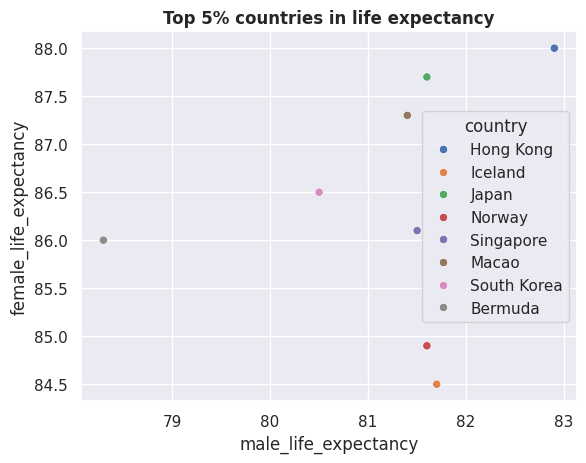

In [51]:
#can we plot life expectancy of top 5% countries
sns.scatterplot(data = top_5, x = "male_life_expectancy", y = "female_life_expectancy", hue = "country").set_title("Top 5% countries in life expectancy", weight = "bold")

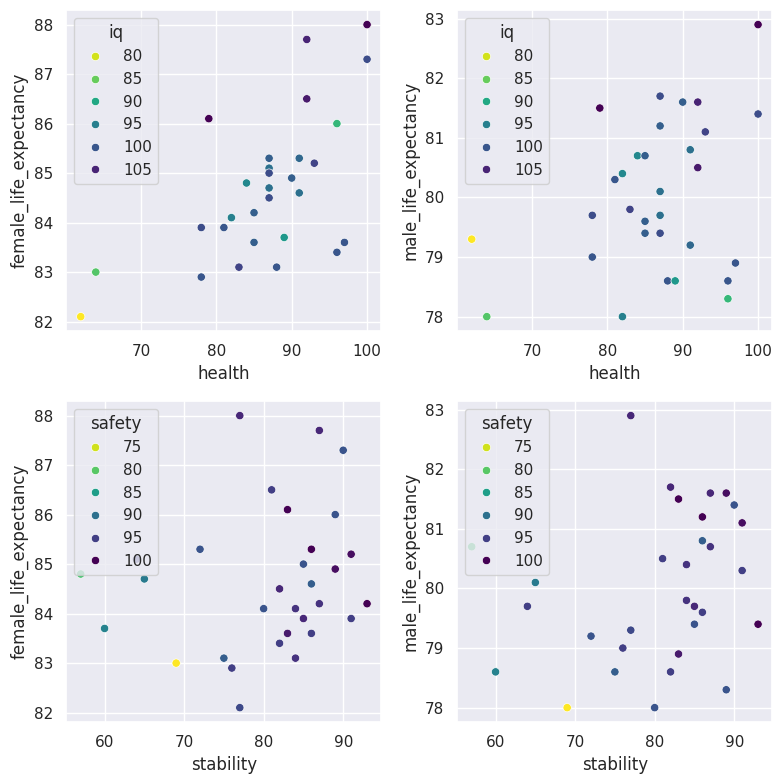

In [52]:
fig, axes = plt.subplots(2,2,figsize=(8,8))
sns.scatterplot(data=top_percentile, y = "female_life_expectancy",x="health", hue = "iq", palette ="viridis_r", ax=axes[0,0])
sns.scatterplot(data=top_percentile, y = "male_life_expectancy", x="health", hue = "iq", palette ="viridis_r", ax=axes[0,1])

sns.scatterplot(data=top_percentile, y="female_life_expectancy",x ="stability", hue= "safety",  palette ="viridis_r", ax=axes[1,0])
sns.scatterplot(data=top_percentile,y="male_life_expectancy",x="stability", hue = "safety",  palette ="viridis_r", ax=axes[1,1])
fig.tight_layout()

**Conclusion**

Hong Kong is the best country with highest life expectancy

Hong Kong, Japan, Singapore, Macao, South Korea and Bermuda are leading in life expectancy

The people in the best countries in life expectancy have very high IQ, at least 101

Countries with high life expectancy, except Singapore, have a healthy population

## Group the countries to identify the best and worst in life expectancy

In [53]:
#create a categorical column
df_copy = df.copy()

In [54]:
df_copy["grouping"] = np.nan

In [55]:
df_copy.loc[df["female_life_expectancy"] >= 85.51, "grouping"] = "Top 5 percent"

In [56]:
for row in df_copy:
  df_copy.loc[df_copy["female_life_expectancy"] >= 85.51, "grouping"] = "top 5 percent"
  df_copy.loc[(df_copy["female_life_expectancy"] <85.51) & (df_copy["female_life_expectancy"] >=  82.95), "grouping"] = "average percent"
  df_copy.loc[df_copy["female_life_expectancy"] < 82.95, "grouping"] = "below average"

In [57]:
df_copy1 = df.copy()
for row in df_copy1:
  df_copy1.loc[(df_copy1["female_life_expectancy"] >= 85.51) &
               (df_copy1["male_life_expectancy"] >=  81.26), "grouping"] = "top countries"
  df_copy1.loc[(df_copy1["female_life_expectancy"] < 82.95) &
               (df_copy1["male_life_expectancy"]<  67.55), "grouping"] = "bottom countries"
  df_copy1.loc[(df_copy1["female_life_expectancy"] <85.51) &
   (df_copy1["female_life_expectancy"] >=  82.95), "grouping"] = "average percent"
  df_copy1.loc[(df_copy1["male_life_expectancy"] <81.26) &
   (df_copy1["female_life_expectancy"] >= 67.55), "grouping"] = "average percent"


In [59]:
df_copy1["grouping"].value_counts()

grouping
average percent     96
bottom countries    15
top countries        4
Name: count, dtype: int64

In [60]:
#pick the top countries
top_countries = df_copy1.query('grouping == "top countries"')
top_countries.index

Index(['Hong Kong', 'Japan', 'Singapore', 'Macao'], dtype='object', name='country')

In [62]:
#pick bottom 5 countries
bottom_five = df_copy1.query('grouping == "bottom countries"')
bottom_five.index[:5]

Index(['Afghanistan', 'Sudan', 'Ghana', 'Haiti', 'Zambia'], dtype='object', name='country')

##**Conclusion**

Hong Kong, Japan, Singapore, and Macao are the top countries where life expectancy is in the top 5 percent.

Afghanistan, Sudan, Ghana, Haiti, and Zambia are the bottom countries with life expectancy below 25 percentile.

# How the dataframe was created


This section is not relevant for doing the project, you can ignore it.

In case the dataset needs to be recreated, or if you are a very curious student, this is how it was done (on a local machine, _not_ in Colab):

```python
import pandas as pd
import glob
from functools import reduce

# 1. Download and extract data from
#    https://www.kaggle.com/datasets/madhurpant/world-population-data

# 2. Merge all dataframes
joint_df = reduce(
    lambda df1, df2: df1.merge(df2, on="country", how="outer"),
    [pd.read_csv(path) for path in glob.glob("world-population-data/*")],
)

# 3. Make "country" the index
joint_df.set_index(["country"], inplace=True)

# 4. Save the result
joint_df.to_csv("world-population-data.csv")
```